# 3.2 线性回归的从零开始实现

In [40]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import sys
from d2lzh_pytorch import * 

### 3.2.1 生成数据集

In [49]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2

features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float32)

print(features[0])
print(labels.size())


tensor([-0.9590,  0.1520])
torch.Size([1000])


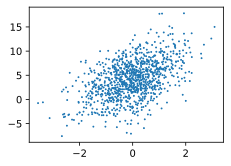

In [43]:
set_figsize()
plt.scatter(features[:,0].numpy(),labels.numpy(),1)

In [52]:
batch_size = 10

for x,y in data_iter(batch_size,features,labels):
    print(x,y)
    break
    

tensor([[ 0.0185, -1.0233],
        [ 0.3881, -0.3991],
        [ 0.0593,  0.3109],
        [-0.2805, -0.2980],
        [-0.9946, -1.0158],
        [ 0.3156,  0.5388],
        [-1.3634, -0.4420],
        [-0.5559,  0.4698],
        [-0.8936,  0.3559],
        [-1.4366,  1.7681]]) tensor([ 7.7271,  6.3304,  3.2621,  4.6619,  5.6717,  2.9945,  2.9722,  1.4925,
         1.1864, -4.6811])


###  3.2.3 初始化模型参数

In [92]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype = torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad = True
b.requires_grad = True

def linreg(x,w,b):
    return torch.mm(x,w)+b

def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

lr = 0.03 # 学习率
num_epochs = 3 # 迭代周期个数
net = linreg
loss = squared_loss

for epoch in range(num_epochs):# 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # x和y分别是小批量样本的特征和标签
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y).sum() # l是有关小批量X和y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w,b],lr,batch_size) # 使用小批量随机梯度下降迭代模型参数
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features,w,b),labels)
    print('epoch %d,loss %f'%(epoch+1,train_l.mean().item()))
    
    print(true_w, '\n', w)
    print(true_b, '\n', b)

epoch 1,loss 0.038065
[2, -3.4] 
 tensor([[ 1.8975],
        [-3.2226]], requires_grad=True)
4.2 
 tensor([4.0135], requires_grad=True)
epoch 2,loss 0.000139
[2, -3.4] 
 tensor([[ 1.9941],
        [-3.3911]], requires_grad=True)
4.2 
 tensor([4.1924], requires_grad=True)
epoch 3,loss 0.000050
[2, -3.4] 
 tensor([[ 1.9992],
        [-3.3999]], requires_grad=True)
4.2 
 tensor([4.1996], requires_grad=True)
